<a href="https://colab.research.google.com/github/cl3225/SUSCPS5040/blob/main/Tornado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of making return level plots for extreme events

Modified from example code provided by Prof. M.K. Tippett at APAM

In [9]:
pip install cartopy

In [3]:
### load commonly used function
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.stats import genextreme, gumbel_r

## Tornados

In [4]:
# Read Tornado CSV file
url = 'https://www.spc.noaa.gov/wcm/data/1950-2024_actual_tornadoes.csv'
df = pd.read_csv(url)

In [5]:
# check the data & find the information
df.keys()

Index(['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
       'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
       'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
      dtype='object')

/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.12/dist-packages/cartopy/io/__init__.py:242: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


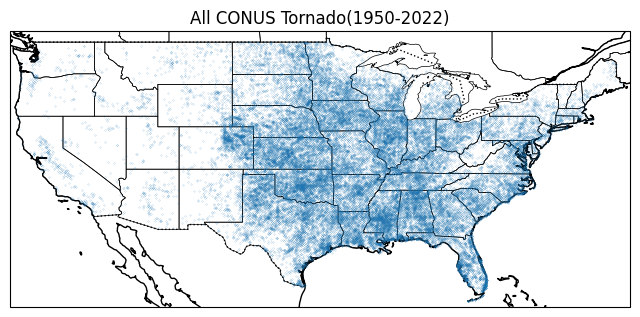

In [6]:
## plot the data

# Create a map projection
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection=proj)

# Set map extent for CONUS
ax.set_extent([-125, -66.5, 24, 50], crs=proj)

# Add coastlines, borders, and states
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linewidth=0.5)

ax.plot(df.elon,df.elat,'.', markersize='0.2')

# Optional: gridlines
#gl = ax.gridlines(draw_labels=True, linewidth=0.3, color='gray', alpha=0.5)
#gl.top_labels = gl.right_labels = False

plt.title("All CONUS Tornado(1950-2022)")
plt.show()


Text(0.5, 1.0, 'return level plots')

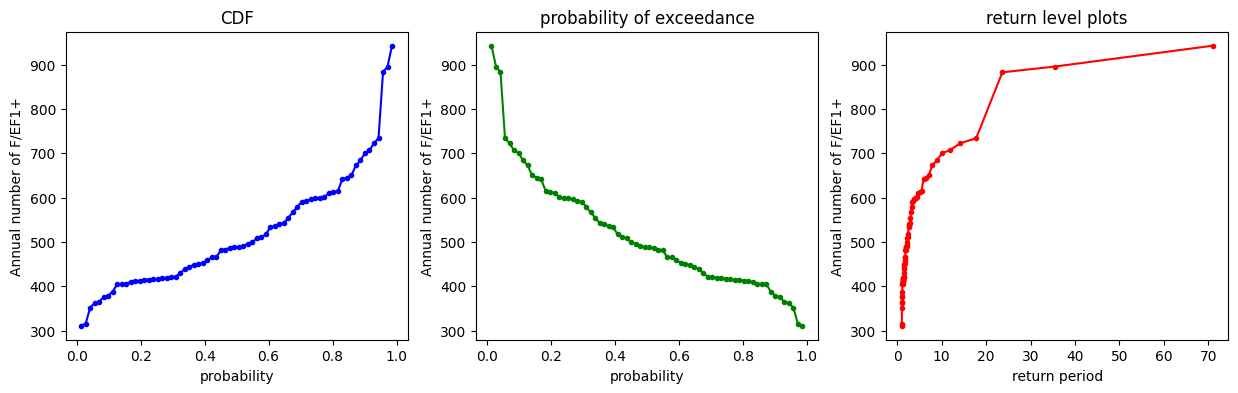

In [7]:
## plot CDF
## find the data you are interested in
x = df.loc[(df['mag'] > 0) & (df['yr'] > 1954)].groupby('yr').sg.sum().values
n = len(x)
## calculate the probability; python indiceis start from 0, so we need to use '+1'
pp = (np.arange(n) + 1) / (n + 1)

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
ax = axs[0]
ax.plot(pp, np.sort(x), 'b.', label='data')
ax.plot(pp, np.sort(x), 'b-', label='data')
ax.set_xlabel('probability')
ax.set_ylabel('Annual number of F/EF1+')
ax.set_title('CDF')

ax = axs[1]
ax.plot((1 - pp), np.sort(x), 'g.')
ax.plot((1 - pp), np.sort(x), 'g-')
ax.set_xlabel('probability')
ax.set_ylabel('Annual number of F/EF1+')
ax.set_title('probability of exceedance')

ax = axs[2]
ax.plot(1/(1 - pp), np.sort(x), 'r.')
ax.plot(1/(1 - pp), np.sort(x), 'r-')
ax.set_xlabel('return period')
ax.set_ylabel('Annual number of F/EF1+')
ax.set_title('return level plots')

0.2146121431837662 355.4905244651243 179.17734714731182
460.0340063813522 98.39606449527069


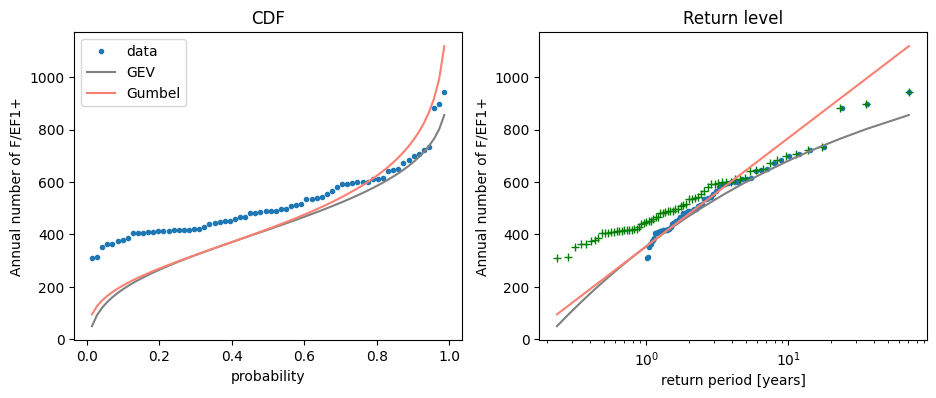

In [8]:
### adding GEV fitting

x = df.loc[(df['mag'] > 0) & (df['yr'] > 1954)].groupby('yr').sg.sum().values
n = len(x)
pp = (np.arange(n) + 1) / (n + 1)

shape, loc, scale = genextreme.fit(x)
print(shape, loc, scale)
loc_g, scale_g = gumbel_r.fit(x)
print(loc_g, scale_g)

fig, axs = plt.subplots(1, 2, figsize=(11, 4))
ax = axs[0]
ax.plot(pp, np.sort(x), '.', label='data')
ax.plot(pp, genextreme.ppf(pp, shape, loc=loc, scale=scale), color='gray', label='GEV')
ax.plot(pp, gumbel_r.ppf(pp, loc=loc, scale=scale), color='salmon', label='Gumbel')
ax.set_xlabel('probability')
ax.set_ylabel('Annual number of F/EF1+')
ax.set_title('CDF')
ax.legend()

ax = axs[1]
ax.plot(1 / (1 - pp), np.sort(x), '.')
# approx return period
ax.plot(- 1 / np.log(pp), np.sort(x), 'g+')
ax.plot(- 1 / np.log(pp), genextreme.ppf(pp, shape, loc=loc, scale=scale), color='gray', label='GEV')
ax.plot(- 1 / np.log(pp), gumbel_r.ppf(pp, loc=loc, scale=scale), color='salmon', label='Gumbel')
ax.set_xscale('log')
ax.set_xlabel('return period [years]')
ax.set_ylabel('Annual number of F/EF1+')
ax.set_title('Return level')
plt.show()